In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from datetime import datetime

## part 2 = continue test
## graphs solution 4,5,6

In [117]:

customers_df = pd.read_csv('Customers.csv')
customers_df.info()
customers = customers_df.dropna()
display(customers.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            500 non-null    int64  
 1   first_name    494 non-null    object 
 2   last_name     494 non-null    object 
 3   gender        447 non-null    object 
 4   age           475 non-null    float64
 5   nationallity  494 non-null    object 
 6   joining_date  439 non-null    object 
 7   phone_number  500 non-null    object 
 8   email         500 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
0,1,Eadie,Maffeo,Female,41.0,France,11/01/2022,534-341-9052,emaffeo0@smh.com.au
1,2,Hammad,Brewerton,Male,56.0,Isreal,30/09/2022,999-994-0510,hbrewerton1@discovery.com
3,4,Frannie,Morewood,Male,84.0,France,26/05/2021,979-187-1493,fmorewood3@vistaprint.com
4,5,Sophi,Fleet,Female,33.0,Sweden,19/07/2021,991-853-9984,sfleet4@unicef.org
5,6,Janine,Voak,Female,52.0,United States,02/08/2020,589-929-6244,jvoak5@php.net


C:\Users\owner\AppData\Local\Temp\ipykernel_7984\3171967710.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['joining_date'] = pd.to_datetime(customers['joining_date'], format='%d/%m/%Y')
C:\Users\owner\AppData\Local\Temp\ipykernel_7984\3171967710.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['joining_year'] = customers['joining_date'].dt.year


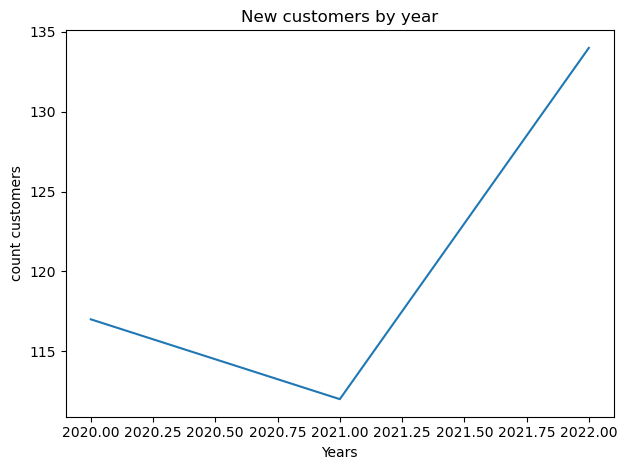

In [118]:
### graph - 4 - 
# customers by years========

customers['joining_date'] = pd.to_datetime(customers['joining_date'], format='%d/%m/%Y')
# change to "year" date
customers['joining_year'] = customers['joining_date'].dt.year

yearly_counts = customers['joining_year'].value_counts().sort_index()


yearly_counts.plot(kind='line')
plt.title('New customers by year')
plt.xlabel('Years')
plt.ylabel('count customers')

plt.tight_layout()
plt.show()



,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE
...,...,...,...,...,...,...,...
595,596,110.0,26 Hudson Lane,5.0,2023-10-30,CREDIT_CARD,WEBSITE
596,597,209.0,37392 Sullivan Park,4.0,2023-08-23,CREDIT_CARD,WEBSITE
597,598,480.0,1473 Ilene Drive,4.0,2023-09-11,CASH,STORE
598,599,72.0,2 Nancy Crossing,4.0,2023-02-09,CASH,STORE


C:\Users\owner\AppData\Local\Temp\ipykernel_7984\1650358641.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['order_date'] = pd.to_datetime(orders['order_date'])
C:\Users\owner\AppData\Local\Temp\ipykernel_7984\1650358641.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['order_month_year'] = orders['order_date'].dt.strftime('%Y-%m')


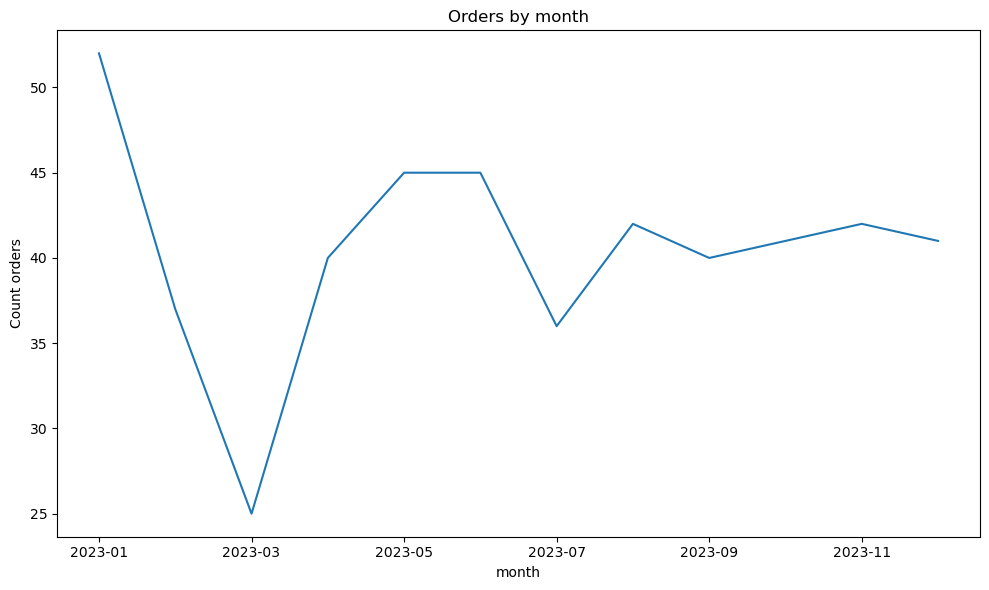

In [119]:
### graph - 5 - 
# sales by mounth ==========

orders_df = pd.read_csv('orders.csv')
orders = orders_df.dropna()
display(orders)

orders['order_date'] = pd.to_datetime(orders['order_date'])
# change to month date
orders['order_month_year'] = orders['order_date'].dt.strftime('%Y-%m')

monthly_orders = orders['order_month_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='line')
plt.title('Orders by month')
plt.xlabel('month')
plt.ylabel('Count orders')


plt.tight_layout()
plt.show()



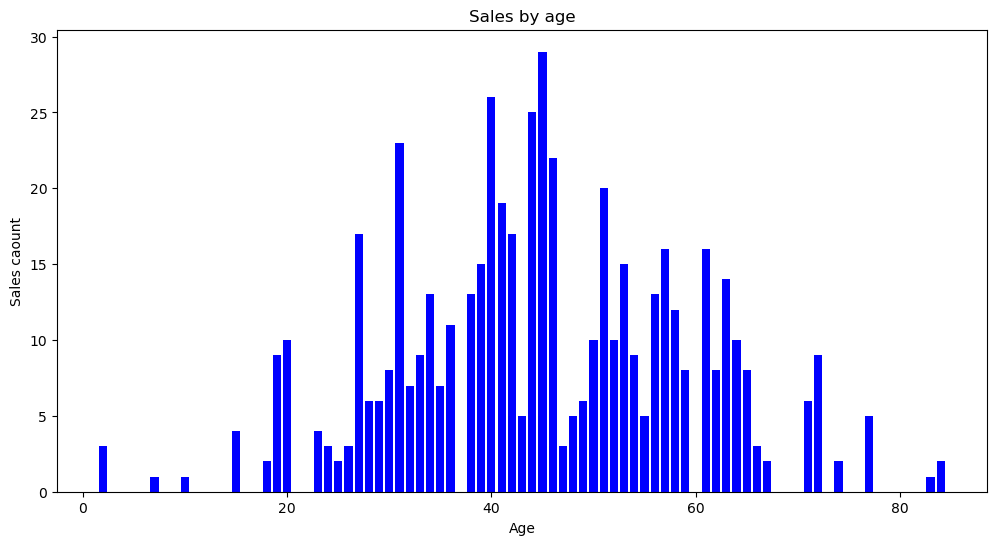

The age that buying the most is 45.0 with 29 purchases .


In [162]:
### graph - 6 -  
# hist sales by age

orders_df = pd.read_csv('orders.csv')
orders = orders_df.dropna()

# connect all df to find costumers with the actually id in the orders
all_df = (customers.merge(orders, left_on='id', right_on='customer_id')
             .merge(order_item, left_on='order_id', right_on='order_id'))


age_group_counts = all_df.groupby('age')['order_id'].count().reset_index()

age_group_counts.columns = ['age', 'total_orders']

#display(age_group_counts)

plt.figure(figsize=(12, 6))
plt.bar(age_group_counts['age'], age_group_counts['total_orders'], color='blue')

plt.title('Sales by age')
plt.xlabel('Age')
plt.ylabel('Sales caount')

plt.show()
# output the age that buy most with nu of buys
max_orders_index = age_group_counts['total_orders'].idxmax() 
max_age = age_group_counts.loc[max_orders_index, 'age']       
max_orders = age_group_counts.loc[max_orders_index, 'total_orders'] 

print(f"The age that buying the most is {max_age} with {max_orders} purchases .")

## data analasis - 2,3,4,5,6

In [161]:
# data analasis Question 2
# 2 =====


order_item_df = pd.read_csv('order_item.csv')
order_item = order_item_df.dropna()

merge_df = pd.merge(orders, order_item, on='order_id', how='inner')
# find who buy the most
customer_quantity = merge_df.groupby('customer_id')['quantity'].sum()

max_customer = customer_quantity.idxmax()
max_quantity = customer_quantity.max()

# change the name to make easyly merge
customers_new = customers.rename(columns={'id': 'customer_id'})

merged_df = pd.merge(orders, customers_new[['customer_id', 'first_name', 'last_name']], on='customer_id', how='inner')

# find the name of customer
customer_names = merged_df[['customer_id','first_name', 'last_name' ]]
customer_max_name = customer_names[customer_names['customer_id'] == max_customer]
# output only the name of custumers
first_name = customer_max_name.iloc[0]['first_name']
last_name = customer_max_name.iloc[0]['last_name']

print(f" {first_name} {last_name} with id {max_customer} bought {max_quantity} items")

      customer_id first_name last_name
31          59.0     Merill  Lacroutz
57          59.0     Merill  Lacroutz
79          59.0     Merill  Lacroutz
144         59.0     Merill  Lacroutz
230         59.0     Merill  Lacroutz with id 59.0 bought 43 items
 Merill Lacroutz with id 59.0 bought 43 items


In [153]:
# data analasis Question 2
# 3 =======
items_df = pd.read_csv('Items.csv')
order_item_df = pd.read_csv('order_item.csv')
items = items_df.dropna()
order_items = order_item_df.dropna()

items_new = items.rename(columns={'id': 'item_id'})
# connect to add the item_price
merged_oi_item = pd.merge(order_items, items_new[['item_id', 'item_price']], on='item_id', how='inner')

# connect to sinc the order_id with price
order_items_merge = pd.merge(order_items,merged_oi_item[['order_id','item_price']], on= 'order_id' , how='inner')

## add column 'total price'
order_items_merge['total_price'] = order_items_merge['quantity'] * order_items_merge['item_price']

display(order_items_merge)

# data analasis Question 2
## 4 ===
#show all buy with total price
buy_and_total = order_items_merge[['order_id','total_price']].sort_values(by= 'order_id', ascending= False)
display(buy_and_total)

total_per_order = order_items_merge.groupby(['order_id'])['total_price'].sum().reset_index()
total_per_order.sort_values(by= 'order_id',ascending=False) # show the sum of all order

,id,order_id,item_id,quantity,item_price,total_price
0,1,337,10.0,2,1251.36,2502.72
1,1,337,10.0,2,4227.36,8454.72
2,2,430,27.0,6,1283.99,7703.94
3,2,430,27.0,6,3344.90,20069.40
4,2,430,27.0,6,1333.04,7998.24
...,...,...,...,...,...,...
1805,998,472,10.0,3,1283.99,3851.97
1806,999,222,29.0,1,4175.99,4175.99
1807,999,222,29.0,1,4227.36,4227.36
1808,1000,337,16.0,1,1251.36,1251.36


,order_id,total_price
1059,599,8351.98
114,599,18520.80
1060,599,7408.32
109,599,1690.78
110,599,29231.93
...,...,...
947,5,21300.48
248,4,965.20
511,3,6843.36
1303,2,10148.58


,order_id,total_price
357,599,113703.66
356,597,1710.84
355,594,267104.16
354,591,65752.40
353,589,101326.39
...,...,...
4,5,127256.25
3,4,965.20
2,3,6843.36
1,2,10148.58


In [156]:
# data analasis Question 2
# 5 ====
expnsive_buy = buy_and_total['total_price'].max()
cheep_buy = buy_and_total['total_price'].min()
avg_of_buy = buy_and_total['total_price'].mean()
print(f"The most expensive buy {expnsive_buy}, the cheepst buy {cheep_buy} and the avg is {avg_of_buy}."
     )

The most expensive buy 40085.1, the cheepst buy 241.54 and the avg is 6830.043016574586.


In [158]:
# data analasis Question 2
# 6 ====
customers.info()

customers_pivot = customers.pivot_table(index='nationallity', columns='gender', values='id', aggfunc='count', fill_value=0)

print("pivot of nation per gender")
display(customers_pivot)

Pivot Table of Customers by Nationality and Gender:


gender,Agender,Bigender,Female,Genderfluid,Genderqueer,Male,Non-binary,Polygender
nationallity,,,,,,,,
Argentina,1,0,8,1,0,6,0,1
Brazil,0,0,5,0,0,15,2,1
Chile,1,0,10,0,0,8,0,0
China,0,0,4,1,1,7,0,0
France,0,0,14,1,0,9,0,0
Germany,0,0,12,0,0,3,0,1
India,0,0,5,0,0,9,0,0
Isreal,1,1,19,5,1,24,0,2
Italy,0,0,13,0,1,10,0,0
